#### Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))
from importlib import reload

import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from config import FEATURES_USED_BY_CLASSIFIER
import numpy as np
import matplotlib.pyplot as plt
import math

## Stopwords_Removed=False, Link_Distance=1&2

In [2]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == False]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] ==25396 ]
#df = df[df["link_distance"] == 1 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.24602941176470586
    Minimum: 0.0
    Maximum: 0.5882352941176471
    Standardabweichung: 0.10372297663658202
Insgesamt 68 Einträge im Dataframe.


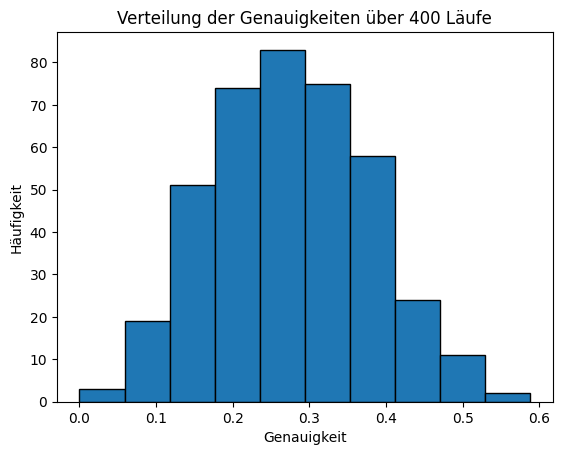

Die zwei wichtigsten Metriken: [('betweenness_min', np.float64(0.10294117647058827)), ('betweenness_max', np.float64(0.10882352941176472))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.4277941176470588
    Minimum: 0.11764705882352941
    Maximum: 0.7647058823529411
    Standardabweichung: 0.1137325788020691
Insgesamt 68 Einträge im Dataframe.


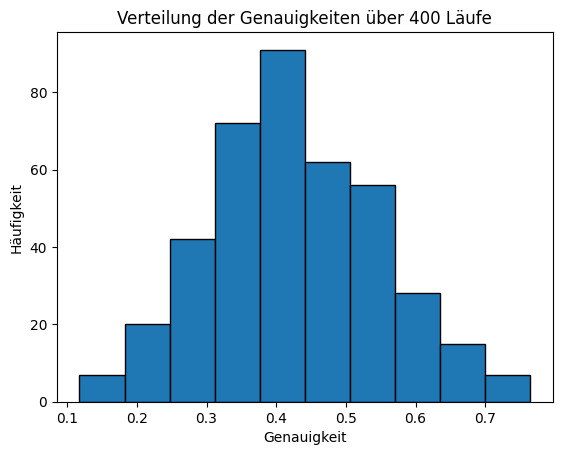

Die zwei wichtigsten Metriken: [('diameter', np.float64(0.22647058823529412)), ('betweenness_max', np.float64(0.3647058823529412))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.2714705882352941
    Minimum: 0.0
    Maximum: 0.5294117647058824
    Standardabweichung: 0.09359736709986922
Insgesamt 68 Einträge im Dataframe.


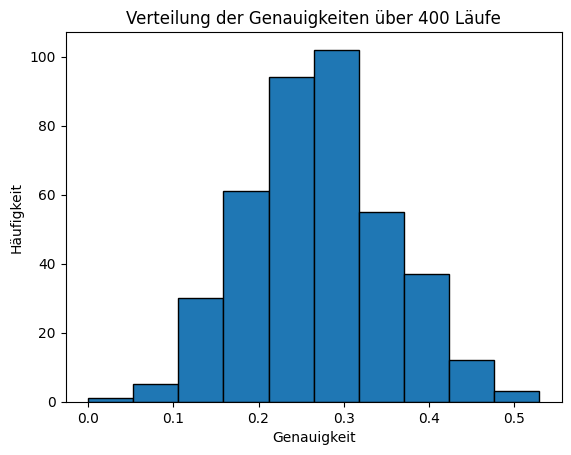

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.17794117647058824)), ('edge_count', np.float64(0.2838235294117647))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.35838235294117643
    Minimum: 0.11764705882352941
    Maximum: 0.7058823529411765
    Standardabweichung: 0.10355186504513214
Insgesamt 68 Einträge im Dataframe.


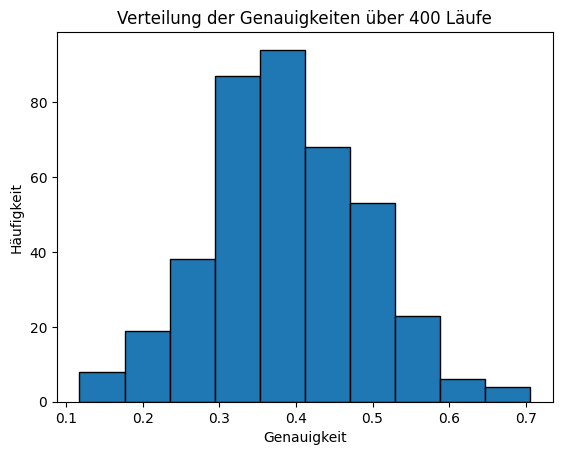

Die zwei wichtigsten Metriken: [('diameter', np.float64(0.06029411764705883)), ('node_count', np.float64(0.08382352941176471))]





In [3]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")


## Stopwords_Removed=False, Link_Distance=1

#### Daten einlesen

In [4]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == False]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == 25396]
df = df[df["link_distance"] == 1 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

#### Klassifikatoren erstellen, trainieren und Genauigkeit auswerten

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.2629513888888889
    Minimum: 0.0
    Maximum: 0.7777777777777778
    Standardabweichung: 0.15139076435510063
Insgesamt 34 Einträge im Dataframe.


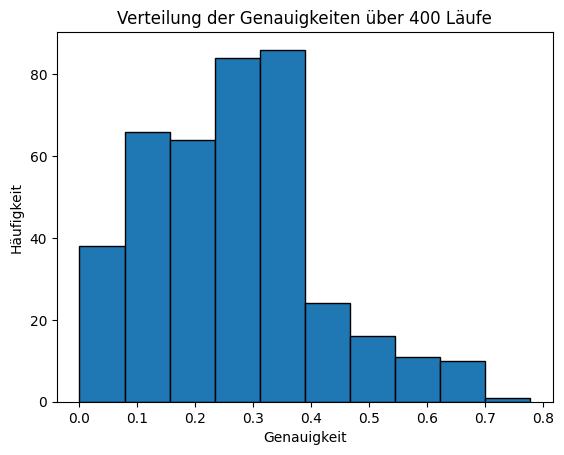

Die zwei wichtigsten Metriken: [('average_clustering', np.float64(-0.08529411764705883)), ('betweenness_average', np.float64(-0.08235294117647059))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.4026041666666667
    Minimum: 0.0
    Maximum: 0.875
    Standardabweichung: 0.16076791976588103
Insgesamt 34 Einträge im Dataframe.


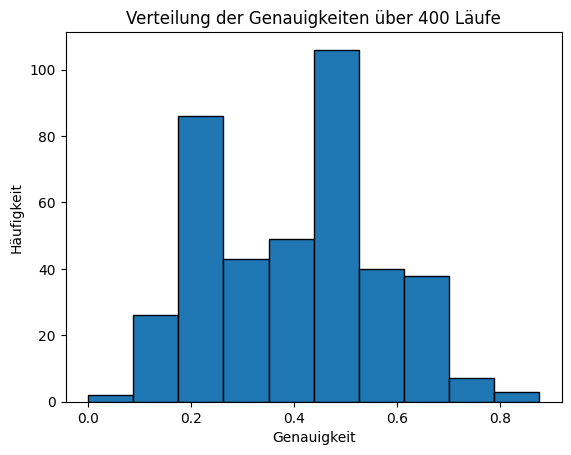

Die zwei wichtigsten Metriken: [('powerlaw_alpha_value', np.float64(0.3323529411764706)), ('diameter', np.float64(0.3911764705882353))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.3145833333333334
    Minimum: 0.0
    Maximum: 0.6666666666666666
    Standardabweichung: 0.1245690875045988
Insgesamt 34 Einträge im Dataframe.


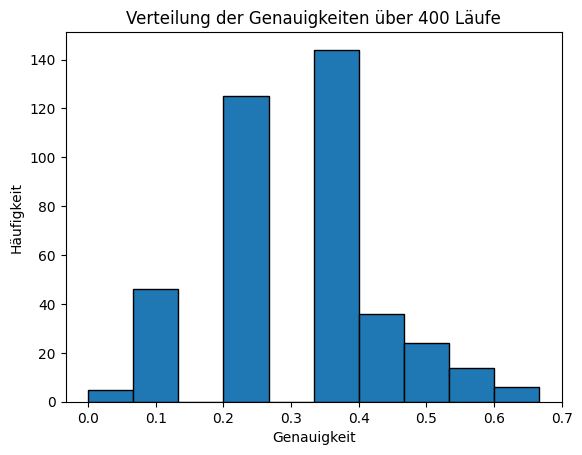

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.28529411764705886)), ('edge_count', np.float64(0.3558823529411765))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.47163194444444445
    Minimum: 0.0
    Maximum: 0.875
    Standardabweichung: 0.15040819827782692
Insgesamt 34 Einträge im Dataframe.


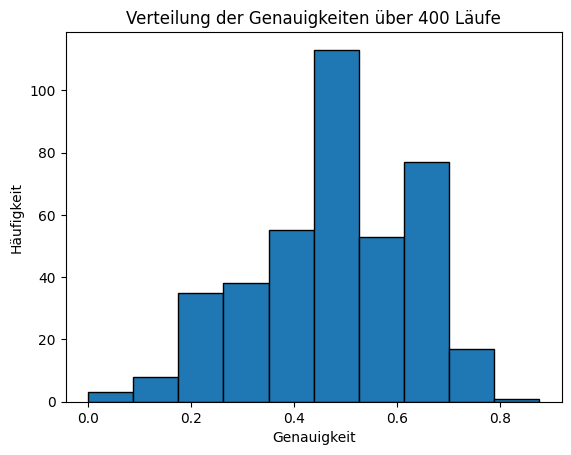

Die zwei wichtigsten Metriken: [('powerlaw_xmin_value', np.float64(0.09705882352941178)), ('diameter', np.float64(0.12058823529411769))]





In [5]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")


## Stopwords_Removed=False, Link_Distance=2

In [6]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == False]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == 25396]
df = df[df["link_distance"] == 2 ]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

# print(df)

Classifier: DummyClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.25222222222222224
    Minimum: 0.0
    Maximum: 0.875
    Standardabweichung: 0.14747384158086232
Insgesamt 34 Einträge im Dataframe.


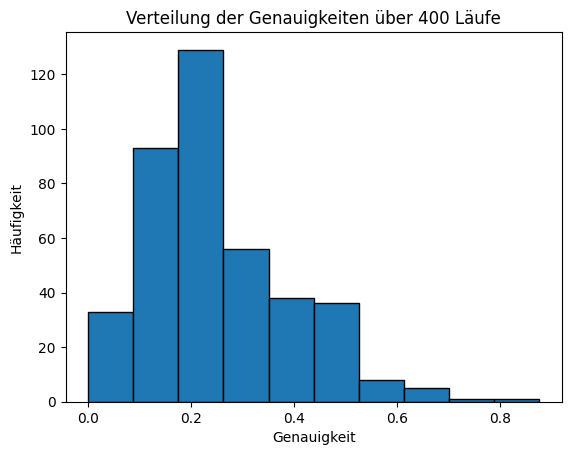

Die zwei wichtigsten Metriken: [('powerlaw_xmin_value', np.float64(0.02352941176470587)), ('average_degree', np.float64(0.03529411764705882))]



Classifier: DecisionTreeClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.42756944444444445
    Minimum: 0.0
    Maximum: 0.8888888888888888
    Standardabweichung: 0.15390917874163948
Insgesamt 34 Einträge im Dataframe.


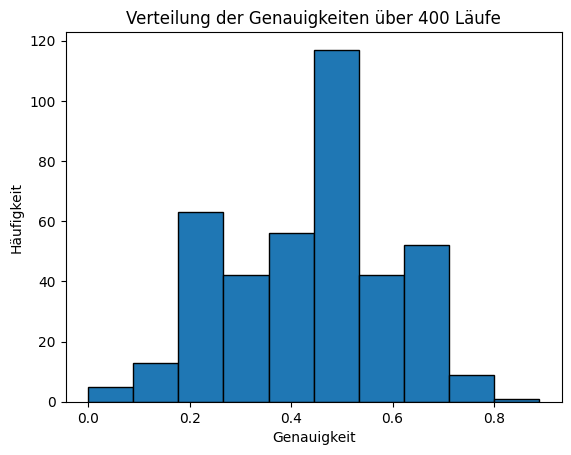

Die zwei wichtigsten Metriken: [('diameter', np.float64(0.24117647058823527)), ('betweenness_standard_deviation', np.float64(0.28823529411764703))]



Classifier: KNeighborsClassifier
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.2753472222222222
    Minimum: 0.0
    Maximum: 0.6666666666666666
    Standardabweichung: 0.13606814443710016
Insgesamt 34 Einträge im Dataframe.


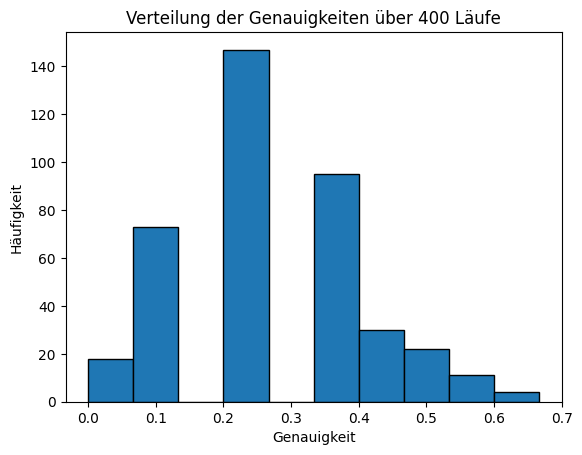

Die zwei wichtigsten Metriken: [('node_count', np.float64(0.10294117647058824)), ('edge_count', np.float64(0.25294117647058817))]



Classifier: GaussianNB
Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.4040625
    Minimum: 0.0
    Maximum: 0.7777777777777778
    Standardabweichung: 0.15802476251859593
Insgesamt 34 Einträge im Dataframe.


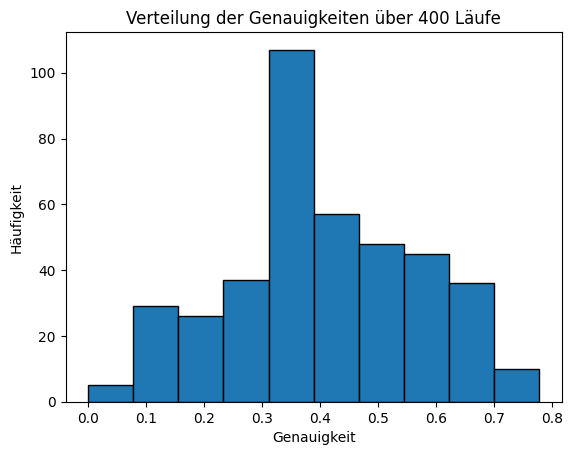

Die zwei wichtigsten Metriken: [('diameter', np.float64(0.0411764705882353)), ('edge_count', np.float64(0.0735294117647059))]





In [7]:

# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100

# Fold festlegen für Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)

classifier_list = [
    DummyClassifier(strategy='uniform'),
    DecisionTreeClassifier(), # Entscheidungsbaum
    KNeighborsClassifier(n_neighbors=5), # KNN-Algorithmus
    GaussianNB() # Naive-Bayes-Algorithmus
]

for classifier in classifier_list:

    # Bilden der Genauigkeitswerte
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv)

    # Statistiken dazu ausgeben
    print(str.format("Classifier: {0}", classifier.__class__.__name__))
    print(f'Testdaten-Anteil: {1 / split_count}')
    print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
    print(f'Genauigkeit: ')
    print(f'    Durchschnitt: {np.mean(accuracy_scores)}')
    print(f'    Minimum: {min(accuracy_scores)}')
    print(f'    Maximum: {max(accuracy_scores)}')
    print(f'    Standardabweichung: {np.std(accuracy_scores)}')
    print(f'Insgesamt {len(df)} Einträge im Dataframe.')

    # Histogramm zu Genauigkeiten plotten
    plt.hist(accuracy_scores, bins=10, edgecolor='black')
    plt.xlabel('Genauigkeit')
    plt.ylabel('Häufigkeit')
    plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
    plt.show()

    # Klassifikator auf alle verfügbaren Daten trainieren, damit Permutationswichtigkeit bestimmt werden kann.
    classifier.fit(X, y)

    # Bestimmung der Permutationswichtigkeit
    permutation_importance_list = permutation_importance(classifier, X, y, n_repeats=10)
    most_important_features = sorted(list(zip(features, permutation_importance_list.importances_mean)), key = lambda x: x[1])[-2:]
    print(f"Die zwei wichtigsten Metriken: {most_important_features}")
    print(f"\n\n")
